In [22]:
import numpy as np
from scipy.special import lambertw
import matplotlib.pyplot as plt
import pandas as pd
import sys

In [23]:
sys.path.append('..')

In [24]:
def S0_FinalSize(C_total,R0):
    return (C_total/(1-np.exp(-R0*C_total)))

In [34]:
R0 = 15
R_inf_vec = np.linspace(10**-8,0.1,1000)
S0_vec = S0_FinalSize(R_inf_vec,R0)

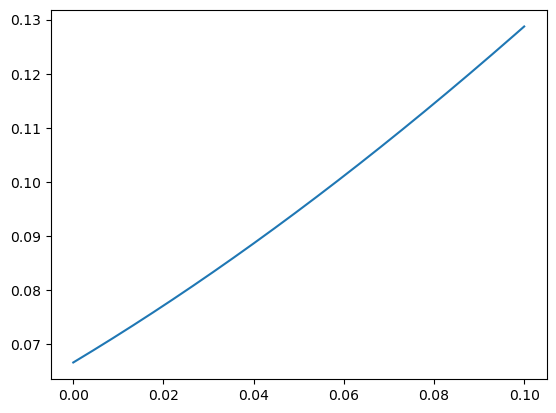

In [35]:
plt.plot(R_inf_vec,S0_vec)
plt.show()

In [36]:
file_path = '../Data/analyzed/basic_age_analysis.csv'
mun_path = '../Data/municipalities.csv'

df_file = pd.read_csv(file_path)
mun_file = pd.read_csv(mun_path)

In [37]:
mun_file['codigo'] = mun_file['municipio'].astype(str).str[:6].astype(int)
mun_file = mun_file[['municipio','name','codigo','pop_21']]

In [38]:
df_cases = df_file.groupby(['ID_MUNICIP'])['CASOS'].sum()
df_cases = df_cases.reset_index(name = 'CASOS_T')
df_cases = df_cases.merge(mun_file, how = 'left', left_on = 'ID_MUNICIP', right_on = 'codigo')
df_cases = df_cases.drop(columns = ['codigo'])
df_cases['CASOS_N'] = (df_cases['CASOS_T']/df_cases['pop_21'])

In [39]:
df_cases = df_cases.sort_values(by = 'CASOS_T',ascending = False)

In [50]:
df_cases['S0_15'] = S0_FinalSize(df_cases['CASOS_N'],15)
df_cases['S0_12'] = S0_FinalSize(df_cases['CASOS_N'],12)
df_cases['S0_17'] = S0_FinalSize(df_cases['CASOS_N'],17)

In [41]:
df_cases['S0_N'] = df_cases['S0']*df_cases['pop_21']

In [42]:
df_cases[:20]

,ID_MUNICIP,CASOS_T,municipio,name,pop_21,CASOS_N,S0,S0_N
710,355030,10195,3550308,São Paulo,12396372,0.000822,0.067079,831532.780663
27,130260,7305,1302603,Manaus,2255903,0.003238,0.068299,154075.600721
61,150140,1546,1501402,Belém,1506420,0.001026,0.067181,101202.983267
763,410690,1441,4106902,Curitiba,1963726,0.000734,0.067034,131636.888438
56,150080,992,1500800,Ananindeua,540410,0.001836,0.067589,36525.609502
25,130250,893,1302504,Manacapuru,99613,0.008965,0.071249,7097.370491
558,351880,828,3518800,Guarulhos,1404694,0.000589,0.066962,94060.876749
458,330455,791,3304557,Rio de Janeiro,6775561,0.000117,0.066725,452099.682096
142,160030,642,1600303,Macapá,522357,0.001229,0.067283,35145.786303
185,230440,536,2304400,Fortaleza,2703391,0.000198,0.066766,180494.199507


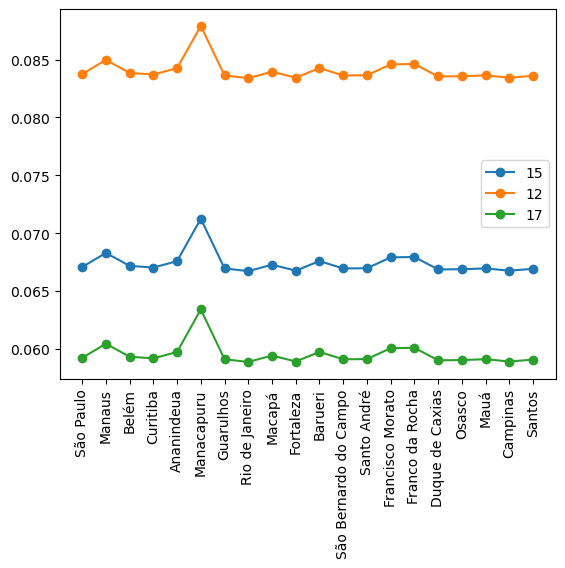

In [52]:
plt.plot(df_cases['name'][:20],df_cases['S0_15'][:20],'-o',label='15')
plt.plot(df_cases['name'][:20],df_cases['S0_12'][:20],'-o', label = '12')
plt.plot(df_cases['name'][:20],df_cases['S0_17'][:20],'-o', label = '17')
plt.xticks(rotation = 90)
plt.legend()
plt.show()



0.07124944024530362